# Rihal Data Science Challenge

You are allowed to use any method in reading, loading, transforming the data. Additionally, you can use any model to predict the price of used cars. 

**Make sure** you explain your approach at each step, and to evaluate your model. Finally, you must show the Mean Asbolute Error from your model's predictions when compared with the test dataset's prices. 

---------------------------

## Imports

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler

pd.options.display.max_columns = 110

## Read Data

In [2]:
df_train = pd.read_csv('data_train.csv')
df_test = pd.read_csv('data_test.csv')

In [3]:
display(df_train.head())
display(df_test.head())

,manufacturer_name,transmission,color,odometer_value,year_produced,engine_fuel,engine_type,engine_capacity,body_type,has_warranty,ownership,type_of_drive,is_exchangeable,number_of_photos,number_of_maintenance,duration_listed,price_usd
0,Volkswagen,automatic,black,130000,2016,diesel,diesel,1.6,universal,False,owned,front,True,17,38,67,13150.0
1,Renault,manual,brown,149000,2012,gasoline,gasoline,1.6,sedan,False,owned,front,False,9,3,100,7500.0
2,Kia,automatic,brown,110000,2014,gasoline,gasoline,1.6,hatchback,False,owned,front,False,5,10,91,12200.0
3,Opel,automatic,other,255100,2007,gasoline,gasoline,1.8,hatchback,False,owned,front,False,10,4,91,4950.0
4,Mazda,manual,blue,650000,1999,gasoline,gasoline,2.0,sedan,False,owned,front,True,5,7,62,3000.0


,manufacturer_name,transmission,color,odometer_value,year_produced,engine_fuel,engine_type,engine_capacity,body_type,has_warranty,ownership,type_of_drive,is_exchangeable,number_of_photos,number_of_maintenance,duration_listed,price_usd
0,BMW,automatic,white,115000,2012,gasoline,gasoline,4.4,sedan,False,owned,all,True,32,104,146,20450.0
1,Mercedes-Benz,manual,other,500000,1999,diesel,diesel,2.2,sedan,False,owned,rear,False,7,9,147,2600.0
2,Fiat,manual,silver,210000,2002,gasoline,gasoline,1.2,hatchback,False,owned,front,True,16,7,27,2900.0
3,Mitsubishi,automatic,violet,294000,2000,diesel,diesel,3.2,suv,False,owned,all,True,10,2,48,7500.0
4,Opel,automatic,blue,244000,1998,gasoline,gasoline,1.6,sedan,False,owned,front,False,9,10,116,2200.0


In [4]:
# getting a statistical summary for numeric variables
df_train.describe()

,odometer_value,year_produced,engine_capacity,number_of_photos,number_of_maintenance,duration_listed,price_usd
count,50000.000000,50000.000000,49985.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,249219.881980,2002.945620,2.056894,9.662420,16.256940,80.739440,6654.891274
std,136361.343789,8.067141,0.675106,6.145263,41.537349,113.606476,6467.096697
min,0.000000,1942.000000,0.200000,1.000000,1.000000,0.000000,1.000000
25%,158000.000000,1998.000000,1.600000,5.000000,2.000000,23.000000,2100.000000
50%,250000.000000,2003.000000,2.000000,8.000000,5.000000,59.000000,4800.000000
75%,325000.000000,2009.000000,2.300000,12.000000,16.000000,91.000000,8990.000000
max,1000000.000000,2019.000000,8.000000,86.000000,1273.000000,2232.000000,50000.000000


### Number of unique values for each column

In [5]:
# we need to check the number of unique values in each column
# just to have an idea of the structure of the data and to identify 
# categorical variables.
df_train.nunique()

manufacturer_name          55
transmission                2
color                      12
odometer_value           5455
year_produced              63
engine_fuel                 6
engine_type                 3
engine_capacity            61
body_type                  12
has_warranty                2
ownership                   3
type_of_drive               3
is_exchangeable             2
number_of_photos           60
number_of_maintenance     365
duration_listed           760
price_usd                2495
dtype: int64

In [6]:
df_test.nunique()

manufacturer_name          55
transmission                2
color                      12
odometer_value           3915
year_produced              63
engine_fuel                 5
engine_type                 3
engine_capacity            59
body_type                  12
has_warranty                2
ownership                   3
type_of_drive               3
is_exchangeable             2
number_of_photos           54
number_of_maintenance     311
duration_listed           654
price_usd                2034
dtype: int64

### Categorical variables to Numeric variables

In [45]:
# first we encode the categorical independent variables
# that is, has_warranty, is_exchangeable, transmission, colour, manufacturer_name etc...
# we do this by creating dummy variables for each value and concatenating 
# them to the current data 


# defining categorical variables
categorical_columns = ['manufacturer_name', 'transmission', 'engine_fuel', 'engine_type', 
                       'has_warranty', 'is_exchangeable', 'type_of_drive', 'color', 'body_type',
                       'ownership']

# generating dummy variables from the categorical variables
df_encode_train = pd.get_dummies(data = df_train, prefix = 'dummy', prefix_sep='_',
               columns = categorical_columns,
               drop_first = True,
               dtype='int8')

df_encode_test = pd.get_dummies(data = df_test, prefix = 'dummy', prefix_sep='_',
               columns = categorical_columns,
               drop_first = True,
               dtype='int8')

In [48]:
# Here we rename identical column names of the binary dummy variables
# These are for has_warranty and is_exhangeable

cols = []
names = ['warranty', 'exchangeable']
count = 0

for column in df_encode_train.columns:
    if column == 'dummy_True':
        cols.append(f'dummy_{names[count]}')
        count+=1
        continue
    cols.append(column)
df_encode_train.columns = cols

cols = []
count = 0
for column in df_encode_test.columns:
    if column == 'dummy_True':
        cols.append(f'dummy_{names[count]}')
        count+=1
        continue
    cols.append(column)
df_encode_test.columns = cols

display(df_encode_train)
display(df_encode_test)

,odometer_value,year_produced,engine_capacity,number_of_photos,number_of_maintenance,duration_listed,price_usd,dummy_Alfa Romeo,dummy_Audi,dummy_BMW,dummy_Buick,dummy_Cadillac,dummy_Chery,dummy_Chevrolet,dummy_Chrysler,dummy_Citroen,dummy_Dacia,dummy_Daewoo,dummy_Dodge,dummy_Fiat,dummy_Ford,dummy_Geely,dummy_Great Wall,dummy_Honda,dummy_Hyundai,dummy_Infiniti,dummy_Iveco,dummy_Jaguar,dummy_Jeep,dummy_Kia,dummy_LADA,dummy_Lancia,dummy_Land Rover,dummy_Lexus,dummy_Lifan,dummy_Lincoln,dummy_Mazda,dummy_Mercedes-Benz,dummy_Mini,dummy_Mitsubishi,dummy_Nissan,dummy_Opel,dummy_Peugeot,dummy_Pontiac,dummy_Porsche,dummy_Renault,dummy_Rover,dummy_Saab,dummy_Seat,dummy_Skoda,dummy_SsangYong,dummy_Subaru,dummy_Suzuki,dummy_Toyota,dummy_Volkswagen,dummy_Volvo,dummy_ВАЗ,dummy_ГАЗ,dummy_ЗАЗ,dummy_Москвич,dummy_УАЗ,dummy_manual,dummy_electric,dummy_gas,dummy_gasoline,dummy_hybrid-diesel,dummy_hybrid-petrol,dummy_electric,dummy_gasoline,dummy_warranty,dummy_exchangeable,dummy_front,dummy_rear,dummy_blue,dummy_brown,dummy_green,dummy_grey,dummy_orange,dummy_other,dummy_red,dummy_silver,dummy_violet,dummy_white,dummy_yellow,dummy_coupe,dummy_hatchback,dummy_liftback,dummy_limousine,dummy_minibus,dummy_minivan,dummy_pickup,dummy_sedan,dummy_suv,dummy_universal,dummy_van,dummy_new,dummy_owned
0,130000,2016,1.6,17,38,67,13150.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1
1,149000,2012,1.6,9,3,100,7500.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
2,110000,2014,1.6,5,10,91,12200.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1
3,255100,2007,1.8,10,4,91,4950.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1
4,650000,1999,2.0,5,7,62,3000.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,380000,1996,1.6,2,2,59,3500.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1
49996,311213,1994,1.8,15,7,29,2850.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1
49997,250000,1999,1.8,7,13,108,2000.0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1
49998,615000,1998,2.5,10,26,64,5080.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1


,odometer_value,year_produced,engine_capacity,number_of_photos,number_of_maintenance,duration_listed,price_usd,dummy_Alfa Romeo,dummy_Audi,dummy_BMW,dummy_Buick,dummy_Cadillac,dummy_Chery,dummy_Chevrolet,dummy_Chrysler,dummy_Citroen,dummy_Dacia,dummy_Daewoo,dummy_Dodge,dummy_Fiat,dummy_Ford,dummy_Geely,dummy_Great Wall,dummy_Honda,dummy_Hyundai,dummy_Infiniti,dummy_Iveco,dummy_Jaguar,dummy_Jeep,dummy_Kia,dummy_LADA,dummy_Lancia,dummy_Land Rover,dummy_Lexus,dummy_Lifan,dummy_Lincoln,dummy_Mazda,dummy_Mercedes-Benz,dummy_Mini,dummy_Mitsubishi,dummy_Nissan,dummy_Opel,dummy_Peugeot,dummy_Pontiac,dummy_Porsche,dummy_Renault,dummy_Rover,dummy_Saab,dummy_Seat,dummy_Skoda,dummy_SsangYong,dummy_Subaru,dummy_Suzuki,dummy_Toyota,dummy_Volkswagen,dummy_Volvo,dummy_ВАЗ,dummy_ГАЗ,dummy_ЗАЗ,dummy_Москвич,dummy_УАЗ,dummy_manual,dummy_electric,dummy_gas,dummy_gasoline,dummy_hybrid-petrol,dummy_electric,dummy_gasoline,dummy_warranty,dummy_exchangeable,dummy_front,dummy_rear,dummy_blue,dummy_brown,dummy_green,dummy_grey,dummy_orange,dummy_other,dummy_red,dummy_silver,dummy_violet,dummy_white,dummy_yellow,dummy_coupe,dummy_hatchback,dummy_liftback,dummy_limousine,dummy_minibus,dummy_minivan,dummy_pickup,dummy_sedan,dummy_suv,dummy_universal,dummy_van,dummy_new,dummy_owned
0,115000,2012,4.4,32,104,146,20450.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1
1,500000,1999,2.2,7,9,147,2600.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
2,210000,2002,1.2,16,7,27,2900.0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1
3,294000,2000,3.2,10,2,48,7500.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1
4,244000,1998,1.6,9,10,116,2200.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26995,92000,1993,2.0,13,11,65,3333.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1
26996,135185,2009,3.5,8,2,85,8500.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
26997,450000,1993,1.8,6,1,35,1100.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1
26998,275000,2006,2.0,7,28,115,6300.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1


## Exploratory Data Analysis

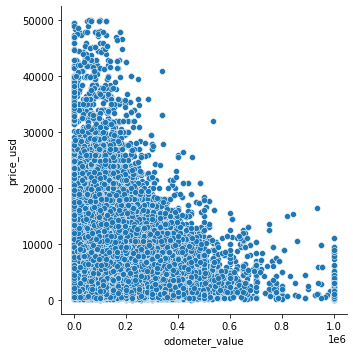

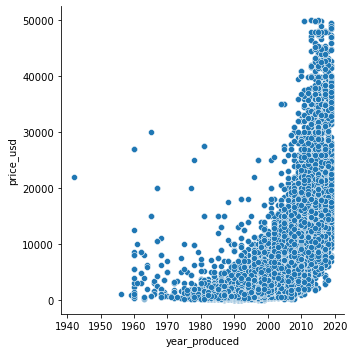

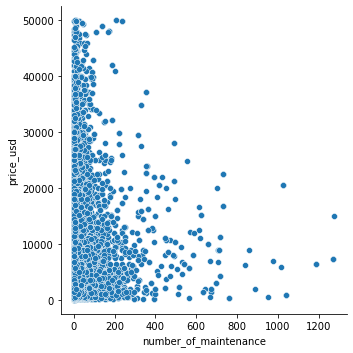

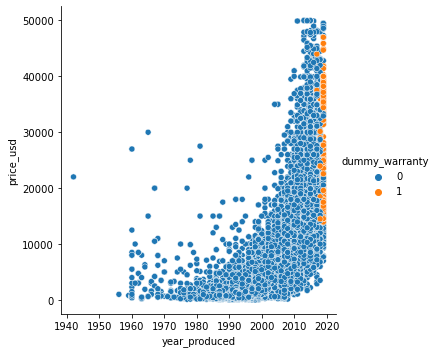

In [49]:
# we will perform statistical analysis to identify important features
# to do this we need to find the correlation between features and the target value
# which is the price in USD, we need to find true predictors to use in the model. 

sns.relplot(x="odometer_value", y="price_usd", data=df_encode_train);
sns.relplot(x="year_produced", y="price_usd", data=df_encode_train);
sns.relplot(x="number_of_maintenance", y="price_usd", data=df_encode_train);
sns.relplot(x="year_produced", y="price_usd", hue= "dummy_warranty", data = df_encode_train)

sns.relplot(x="year_produced", y="price_usd", hue= "dummy_exchangeable", data = df_encode_train)

## Feature scaling

In [10]:
# we standardize data to maintain a smaller range 
# of values for each column
# Feature scaling will not be 
# applied on the dummy variables, since we would like
# to be able to maintain the interpretation of these 
# variables to decode them

# we use the formula -> x_stand = (x - mean(x))/std(x)

# first we can convert these dataframes to numpy arrays

X_train = df_encode_train.iloc[:, df_encode_train.columns != 'price_usd']
y_train = df_encode_train.iloc[:, 6]

X_test = df_encode_test.iloc[:, df_encode_test.columns != 'price_usd']
y_test = df_encode_test.iloc[:, 6]

In [11]:
# df_encode_train['odometer_value'] = (df_encode_train['odometer_value'] -
#                                      df_encode_train['odometer_value'].mean()) / df_encode_train['odometer_value'].std()

# df_encode_train['year_produced'] = (df_encode_train['year_produced'] -
#                                      df_encode_train['year_produced'].mean()) / df_encode_train['year_produced'].std()

# df_encode_train['engine_capacity'] = (df_encode_train['engine_capacity'] -
#                                      df_encode_train['engine_capacity'].mean()) / df_encode_train['engine_capacity'].std()

# df_encode_train['number_of_photos'] = (df_encode_train['number_of_photos'] -
#                                      df_encode_train['number_of_photos'].mean()) / df_encode_train['number_of_photos'].std()

# df_encode_train['number_of_maintenance'] = (df_encode_train['number_of_maintenance'] -
#                                      df_encode_train['number_of_maintenance'].mean()) / df_encode_train['number_of_maintenance'].std()

# df_encode_train['duration_listed'] = (df_encode_train['duration_listed'] -
#                                      df_encode_train['duration_listed'].mean()) / df_encode_train['duration_listed'].std()

In [12]:
# display(df_encode_train)

In [13]:
# output_vectors = df_encode_train['price_usd']
# print(output_vectors)

## Model Selection

In [14]:
# we perfom forward selection to identify features 
# which are true predictors and eliminate ones which are not. 
# we use the P-value to do this We use a significance level of 0.05